<a href="https://colab.research.google.com/github/inefable12/nlp/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{Introducción Práctica al Procesamiento de Lenguaje Natural}$$

$$\large\textbf{NLP desde GOOGLE COLAB}$$

_Jesus Alvarado Huayhuaz_

_2024_
___

<img src="https://datasciencedojo.com/wp-content/uploads/MicrosoftTeams-image-34-1.jpg" width="900" alt="nlp ogo"  />

# 1. Instalar requerimientos

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:26
🔁 Restarting kernel...


In [ ]:
# Dar enter para continuar
!conda install -c anaconda nltk

**Nota**:

Hasta aquí probablemente te apareció un mensaje del reinicio de la sesión.

No te preocupes, ejecuta la siguiente celda para verificar la instalación

In [3]:
!conda --version

conda 23.11.0


In [4]:
import nltk

In [ ]:
nltk.download()
# "q" para salir
# nltk.download('stopwords'), esta descarga es requerida más adelante

# 2. Análisis de artículo científico en Scielo

Vamos a trabajar con el siguiente artículo en español:

http://www.scielo.org.pe/scielo.php?script=sci_abstract&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es

## 2.1 Web scrapping

In [13]:
import urllib.request

# Add headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}
req = urllib.request.Request('http://www.scielo.org.pe/scielo.php?script=sci_abstract&pid=S1810-634X2023000100068&lng=es&nrm=iso&tlng=es', headers=headers)

try:
    response = urllib.request.urlopen(req)
    # Process the response here
except urllib.error.HTTPError as e:
    print(f"HTTP Error: {e.code} - {e.reason}")
except urllib.error.URLError as e:
    print(f"URL Error: {e.reason}")

In [14]:
html = response.read()

In [15]:
print(html)

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:mml="http://www.w3.org/1998/Math/MathML"><head><title>Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silico</title><meta http-equiv="Pragma" content="no-cache"></meta><meta http-equiv="Expires" content="Mon, 06 Jan 1990 00:00:01 GMT"></meta><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"></meta><meta name="citation_journal_title" content="Revista de la Sociedad Qu\xc3\xadmica del Per\xc3\xba"></meta><meta name="citation_publisher" content=""></meta><meta name="citation_title" content="Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silico"></meta><meta name="citation_date" content="01/2023"></meta><meta name="citation_volume" content="89"></meta><meta 

In [16]:
from bs4 import BeautifulSoup
import string

In [17]:
# Limpiar etiquetas HTML
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)

In [18]:
print(text)

Reconocimiento molecular de complejos de desferrioxamina con aluminio, galio y hierro en el receptor fhue: un estudio in silicoServicios PersonalizadosRevistaSciELO AnalyticsGoogle Scholar H5M5 ()$(document).ready(function() {
                  var url =  "/google_metrics/get_h5_m5.php?issn=1810-634X&callback=?";
                  $.getJSON(url,  function(data) {
                      $("#google_metrics_year").html(data['year']);
                      $('#google_metrics_link').attr('href', data['url']);
                      $("#google_metrics_link_li").show();
                  });
              });ArticuloEspañol (pdf)Articulo en XMLReferencias del artículoComo citar este artículoSciELO AnalyticsTraducción automáticaEnviar articulo por emailIndicadoresCitado por SciELOLinks relacionadosSimilares en
    SciELOCompartirOtrosOtrosPermalinkRevista de la Sociedad Química del Perúversión impresaISSN1810-634XResumenALVARADO-HUAYHUAZ,  Jesús;PUMA ZAMORA,  Wilmar;BRAGA,  Ataualpa C.yVALDERRAM

## 2.2 Tokenizar texto

In [19]:
# Convertir texto en tokens
tokens = [t for t in text.split()]

In [20]:
print(tokens)

['Reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoServicios', 'PersonalizadosRevistaSciELO', 'AnalyticsGoogle', 'Scholar', 'H5M5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634X&callback=?";', '$.getJSON(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});ArticuloEspañol', '(pdf)Articulo', 'en', 'XMLReferencias', 'del', 'artículoComo', 'citar', 'este', 'artículoSciELO', 'AnalyticsTraducción', 'automáticaEnviar', 'articulo', 'por', 'emailIndicadoresCitado', 'por', 'SciELOLinks', 'relacionadosSimilares', 'en', 'SciELOCompartirOtrosOtrosPermalinkRevista', 'de', 'la', 'Sociedad', 'Química', 'del', 'Perúversión', 'impresaISSN1810-634XResumenALVARADO-HUAYHUAZ,', 'Jesú

In [21]:
# convert a minuscula
tokens = [w.lower() for w in tokens]

In [22]:
print(tokens)

['reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'h5m5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634x&callback=?";', '$.getjson(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});articuloespañol', '(pdf)articulo', 'en', 'xmlreferencias', 'del', 'artículocomo', 'citar', 'este', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'por', 'emailindicadorescitado', 'por', 'scielolinks', 'relacionadossimilares', 'en', 'scielocompartirotrosotrospermalinkrevista', 'de', 'la', 'sociedad', 'química', 'del', 'perúversión', 'impresaissn1810-634xresumenalvarado-huayhuaz,', 'jesú

In [23]:
"abc".isalpha()

True

In [24]:
"123".isalpha()

False

In [25]:
# remover signos de puntuacion
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# eliminar tokens restantes que no son alfabeticos
words = [word for word in stripped if word.isalpha()]

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Limpiar stopwords
from nltk.corpus import stopwords

In [37]:
# filter out stop words (palabras de parada)
stop_words = set(stopwords.words('spanish'))  # convertir a conjunto
words = [w for w in words if not w in stop_words]

In [38]:
print(words)

['reconocimiento', 'molecular', 'complejos', 'desferrioxamina', 'aluminio', 'galio', 'hierro', 'receptor', 'fhue', 'estudio', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'documentreadyfunction', 'var', 'url', 'getjsonurl', 'functiondata', 'googlemetricsyearhtmldatayear', 'googlemetricslinkattrhref', 'dataurl', 'googlemetricslinklishow', 'articuloespañol', 'pdfarticulo', 'xmlreferencias', 'artículocomo', 'citar', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'emailindicadorescitado', 'scielolinks', 'relacionadossimilares', 'scielocompartirotrosotrospermalinkrevista', 'sociedad', 'química', 'perúversión', 'jesúspuma', 'zamora', 'wilmarbraga', 'ataualpa', 'cyvalderrama', 'negron', 'ana', 'ceciliareconocimiento', 'molecular', 'complejos', 'desferrioxamina', 'aluminio', 'galio', 'hierro', 'receptor', 'fhue', 'estudioin', 'silicorev', 'soc', 'quím', 'perúonline', 'epub', 'issn', 'organización', 'mundial', 'salud', 'categorizado',

In [39]:
print(tokens)

['reconocimiento', 'molecular', 'de', 'complejos', 'de', 'desferrioxamina', 'con', 'aluminio,', 'galio', 'y', 'hierro', 'en', 'el', 'receptor', 'fhue:', 'un', 'estudio', 'in', 'silicoservicios', 'personalizadosrevistascielo', 'analyticsgoogle', 'scholar', 'h5m5', '()$(document).ready(function()', '{', 'var', 'url', '=', '"/google_metrics/get_h5_m5.php?issn=1810-634x&callback=?";', '$.getjson(url,', 'function(data)', '{', '$("#google_metrics_year").html(data[\'year\']);', "$('#google_metrics_link').attr('href',", "data['url']);", '$("#google_metrics_link_li").show();', '});', '});articuloespañol', '(pdf)articulo', 'en', 'xmlreferencias', 'del', 'artículocomo', 'citar', 'este', 'artículoscielo', 'analyticstraducción', 'automáticaenviar', 'articulo', 'por', 'emailindicadorescitado', 'por', 'scielolinks', 'relacionadossimilares', 'en', 'scielocompartirotrosotrospermalinkrevista', 'de', 'la', 'sociedad', 'química', 'del', 'perúversión', 'impresaissn1810-634xresumenalvarado-huayhuaz,', 'jesú

In [40]:
# Contar frecuencia de palabras
freq = nltk.FreqDist(words)

for key,val in freq.items():
    pass
    #print (str(key) + ':' + str(val))

In [41]:
freq.most_common(10)

[('molecular', 6),
 ('complejos', 5),
 ('fhue', 5),
 ('reconocimiento', 4),
 ('desferrioxamina', 4),
 ('aluminio', 4),
 ('efecto', 4),
 ('fedfo', 4),
 ('galio', 3),
 ('hierro', 3)]

In [34]:
# Si no hubiésemos cambiado el idioma
# freq.most_common(10)

[('de', 27),
 ('en', 15),
 ('el', 8),
 ('la', 7),
 ('molecular', 6),
 ('complejos', 5),
 ('fhue', 5),
 ('un', 5),
 ('reconocimiento', 4),
 ('desferrioxamina', 4)]

## 2.3 Nube de palabras

In [35]:
# Graficos
import matplotlib.pyplot as plt

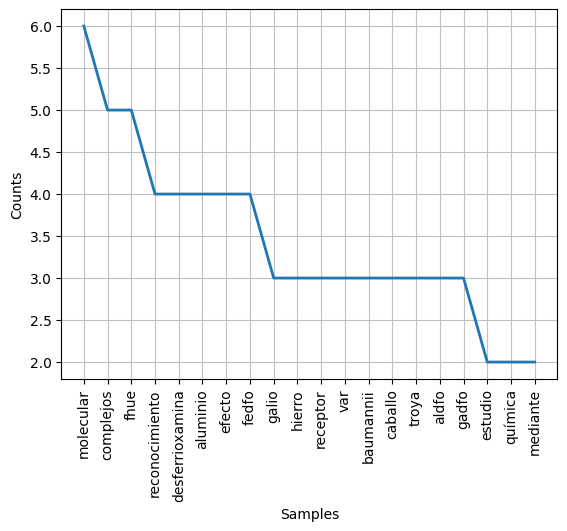

In [42]:
freq.plot(20, cumulative=False)
plt.show()

In [43]:
from wordcloud import WordCloud

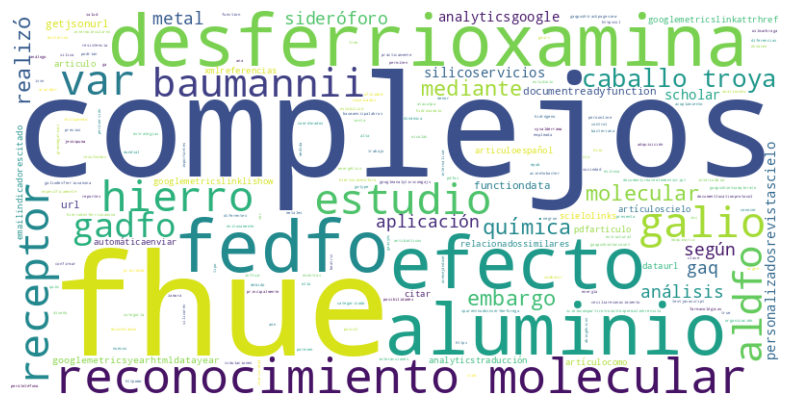

In [44]:
# Importar la librería wordcloud
from wordcloud import WordCloud

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Actividad 1

Realiza un tratamiento del texto en el siguiente artículo y elabora una nube de palabras según la frecuencia de uso:

https://www.nytimes.com/article/what-is-coronavirus.html

# 3. Análisis de discursos de presidentes en la ONU

Los representantes de los países de todo el mundo se reúnen todos los años para la reunión General
de las Naciones Unidas. El archivo JSON llamado __"session74.json"__ contiene los discursos
pronunciados por delegados de cuatro países durante el Debate General de la 74.a Sesión (2019) de esa asamblea:
Francia, Rusia, Turquía y Estados Unidos. Todos los discursos están en idioma inglés.

## 3.1 Cargamos el texto

In [50]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

# Descargamos los discursos
!wget -O session74.json https://raw.githubusercontent.com/inefable12/nlp/refs/heads/main/session74.json
session = "session74.json"
# Cargamos el texto
file = open(session,'rt')
text = file.read()
file.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--2024-10-24 23:56:02--  https://raw.githubusercontent.com/inefable12/nlp/refs/heads/main/session74.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95253 (93K) [text/plain]
Saving to: ‘session74.json’

session74.json      100%[===================>]  93.02K  --.-KB/s    in 0.03s   

2024-10-24 23:56:02 (3.08 MB/s) - ‘session74.json’ saved [95253/95253]



### A. Escriba un código que cargue los cuatro documentos (discursos) y los procese previamente. Específicamente, tokenizar cada documento, eliminar palabras vacías, eliminar la puntuación y convertir cada palabra en minúsculas.

In [51]:
# Separar discursos
import json
speeches = json.loads(text)
france = speeches["France"]
united_states = speeches["USA"]
russia = speeches["Russia"]
turkey = speeches["Turkey"]

#### Tokenización

In [52]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [53]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [55]:
tk_france = word_tokenize(france)

In [56]:
# Librerias necesarias
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

In [57]:
# tokens por pais
tokenized_country = {}
for country in speeches:

    # split into words
    tokens = word_tokenize(speeches[country])

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    tokenized_country[country] = words

In [58]:
speeches.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [59]:
tokenized_country.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [60]:
tokenized_country['France'][0:10]

['gathered',
 'general',
 'assembly',
 'time',
 'secretarygeneral',
 'chosen',
 'important',
 'theme',
 'climate',
 'met']

In [61]:
speeches['France'][0:100]

'We are gathered here at the General Assembly at a time when the Secretary-General has chosen the ver'

Observamos que palabras como "we", "are", "here", etc, han sido tokenizados

In [62]:
tokenized_country['Russia'][0:10]

['getting',
 'ever',
 'closer',
 'seventyfifth',
 'anniversary',
 'united',
 'nations',
 'established',
 'thanks',
 'victory']

In [63]:
speeches['Russia'][0:100]

'We are getting ever closer to the seventy-fifth anniversary of the United Nations, which was establi'

### B. Busque los 10 tokens más frecuentes para cada documento (país) e informe resultados como su respuesta.

In [64]:
from nltk import FreqDist

In [65]:
tokenized_country.keys()

dict_keys(['France', 'Russia', 'Turkey', 'USA'])

In [66]:
fdist = FreqDist(tokenized_country['France'])
fdist.most_common(10)

[('must', 36),
 ('believe', 23),
 ('climate', 22),
 ('countries', 20),
 ('change', 19),
 ('courage', 19),
 ('fight', 17),
 ('us', 16),
 ('many', 15),
 ('agenda', 15)]

In [67]:
fdist = FreqDist(tokenized_country['Russia'])
fdist.most_common(10)

[('united', 24),
 ('security', 23),
 ('states', 20),
 ('nations', 17),
 ('international', 15),
 ('countries', 14),
 ('russia', 14),
 ('also', 13),
 ('world', 12),
 ('rules', 11)]

En resumen, tokens son sustantivos y/o verbos, mientras que los stopwords son artículos, conectores, etc.

### C. Encuentra dos tokens seguidos que se mencionan constantemente

In [68]:
import collections

In [69]:
# Para generar n-grams, en particular n-grams
ngrams_russia = list(nltk.ngrams(tokenized_country["Russia"],2))

In [70]:
ngrams_usa = list(nltk.ngrams(tokenized_country["USA"],2))

In [71]:
# using Counter to find frequency of elements
ngrams_russia_count = collections.Counter(ngrams_russia)
ngrams_usa_count = collections.Counter(ngrams_usa)  # dictionary

In [72]:
# Primeros 10 ngrams
ngrams_russia_items = ngrams_russia_count.items()
first_russia = list(ngrams_russia_items)[:10]
first_russia

[(('getting', 'ever'), 1),
 (('ever', 'closer'), 1),
 (('closer', 'seventyfifth'), 1),
 (('seventyfifth', 'anniversary'), 1),
 (('anniversary', 'united'), 2),
 (('united', 'nations'), 15),
 (('nations', 'established'), 1),
 (('established', 'thanks'), 1),
 (('thanks', 'victory'), 1),
 (('victory', 'second'), 1)]

In [73]:
a1 = ngrams_russia_count.copy()  # copiar diccionario
a1_sorted_keys = sorted(a1, key=a1.get, reverse=True)  # ordenar los valores del diccionario
collections_russia = []  # listar clave y valor del diccionario ya ordenado
for r in a1_sorted_keys:
    collections_russia.append((r, a1[r]))

In [74]:
collections_russia[:10]

[(('united', 'nations'), 15),
 (('security', 'council'), 10),
 (('united', 'states'), 9),
 (('international', 'law'), 6),
 (('world', 'war'), 3),
 (('international', 'community'), 3),
 (('council', 'resolutions'), 3),
 (('would', 'like'), 3),
 (('general', 'assembly'), 3),
 (('president', 'putin'), 3)]